**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identification

Name: Thulam Tran<br/>
Student Number: 300185320

Name: Samy Touabi<br/>
Student Number: 300184721

### The following notebook has been run and the code successfuly completes using Google Colab. Use only in Google Colab instead of locally.
### Notebook Google Drive Link, open using Colab: https://drive.google.com/file/d/1LORVbE9PqI6oAbzeRiUTzmHvAgfn5dwx/view?usp=sharing

## 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [44]:
# Important Imports
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.width', 200) # This makes the tables display across the entire cells

In [45]:
# Read the dataset
url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv"

dataset = pd.read_csv(url)

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

### Dataset Structure Summary:
The features (columns) are the following, with the last one being the target variable:
```
gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, diabetes
```
Binary features indicate two integer values, 1 as presence of features where 0 indicates absence of features.
1. **gender**: String representing the biological sex of the patient, either Male, Female or Other.
1. **age**: Decimal representing yearly age of the patient, with the max age of 80.
2. **hypertension**: This is a binary feature indicating the presence of high blood pressure in arteries.
3. **heart_disease**: This is a binary feature indicating the presence of heart disease.
3. **smoking_history**: String describing smoking status of the patient with the following assumption of values: '*never*' meaning never smoked, '*No Info*' meaning status is unknown, '*current*' meaning current smoker, '*former*' indicating used to be current smoker but has quit being a current smoker, '*ever*' meaning have smoked at least once in life but not yet a current smoker, '*not current*' meaning has smoked but not as of a high frequency as a current smoker.
4. **bmi**: Decimal representing the body mass index (BMI) of the patient, measures body fat based on weight and height, values less than 18.5 are underweight, [18.5,25) are normal, [25-30) are overweight, and 30 or more is obese.
5. **HbA1c_level**: Float representing Hemoglobin A1c (HbA1c) % level representing the patient's average blood sugar level over the past 2-3 months (values more than 6.5% indicate greater risk of diabetes).
6. **blood_glucose_level**: Integer representing the amount of glucose in the bloodstream at a  given time (in mg/dL).
7. **diabetes**: The target variable being predicted, a binary feature indicating the presence of diabetes in a patient.

# Notes
1. The values for **smoking_history** are somewhat confusing. This issue was raised in the [comments of the Kaggle dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/discussion/402659), but the creator did not clarify properly.
2. **BMI** is now a more or less contested metric as a measure of health by [many experts](https://www.medicalnewstoday.com/articles/265215)


Source: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data



In [46]:
# Sample of the dataset,
#with 100000 rows representing individual patients × 9 column features
#described above
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


The following cells describe the data types for each feature, the unique values in each column, and the indication of null values (which there are none).

In [47]:
dataset.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [48]:
# Display all possible values present in the dataset, per column
for col in dataset.columns:
    print(f"Unique values in column '{col}':")
    print(dataset[col].unique())
    print()

Unique values in column 'gender':
['Female' 'Male' 'Other']

Unique values in column 'age':
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]

Unique values in column 'hypertension':
[0 1]

Unique values in column 'heart_disease':
[1 0]

Unique values in column 'smoking_history':
['never' 'No Info' 'current' 'former' 'ever' 'not current']

Unique values in column 'bmi':
[25.19 27.32 23.45 ... 59.42 44.39 60.52]

Unique values in colum

In [49]:
# Determine if there are missing values in the dataset (there are not)
missing_values = dataset.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

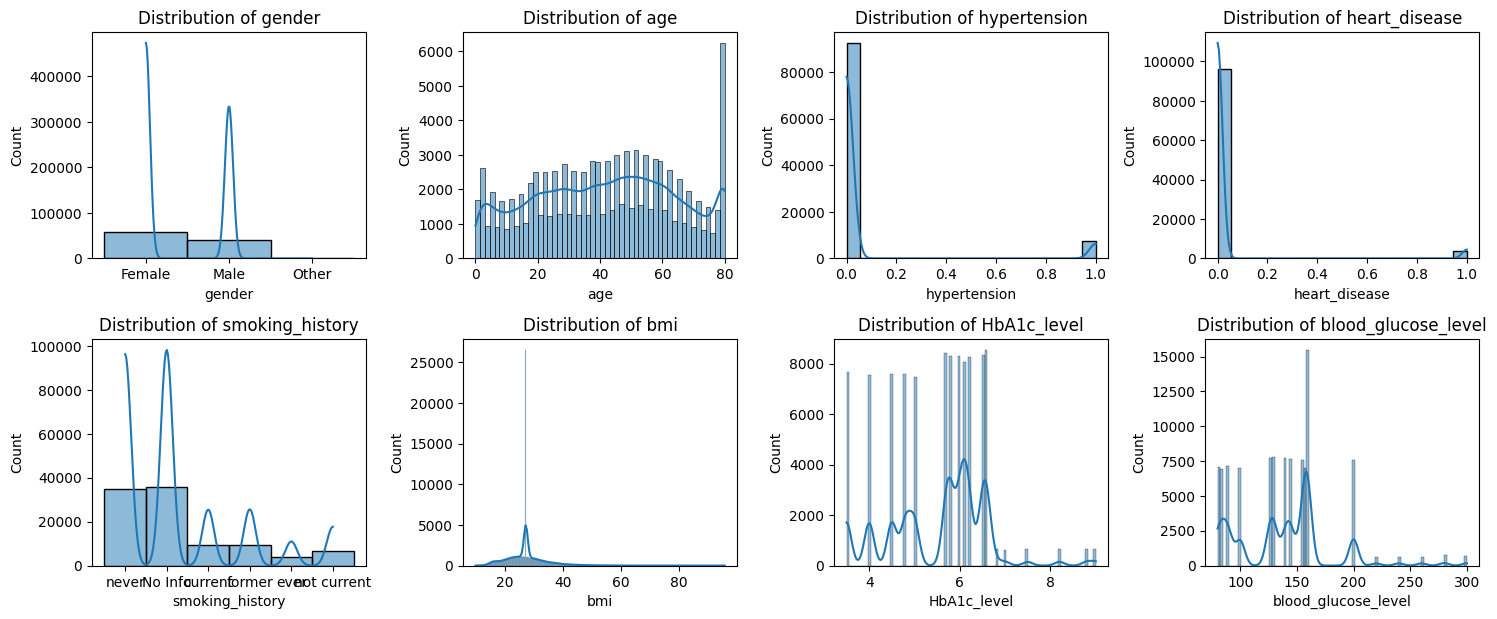

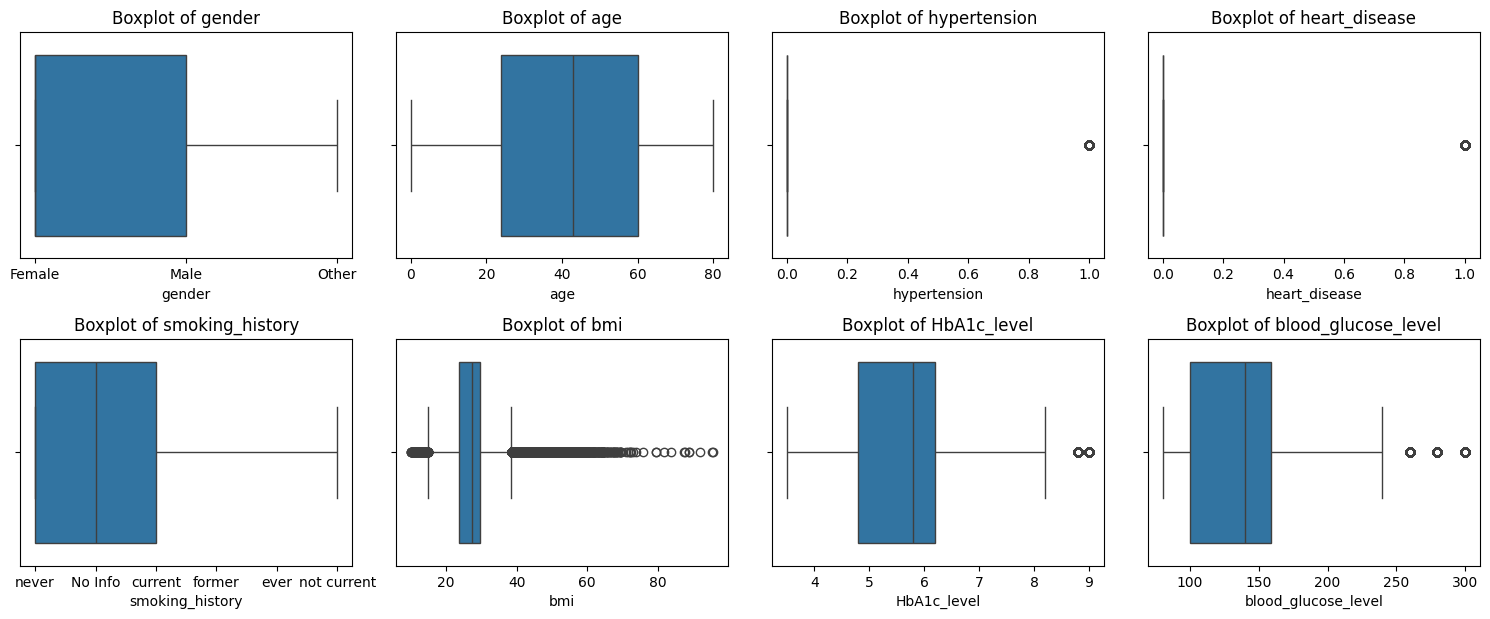

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plots
plt.figure(figsize=(15, 12))

# Loop through each column to create histograms and boxplots
for i, column in enumerate(dataset.columns[:-1]):  # Exclude the target column if necessary
    plt.subplot(4, 4, i+1)
    sns.histplot(dataset[column], kde=True)  # Histogram with Kernel Density Estimate
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

# Boxplots to visualize outliers
plt.figure(figsize=(15, 12))
for i, column in enumerate(dataset.columns[:-1]):  # Exclude the target column if necessary
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=dataset[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

# IMPORTANT NOTE: Histograms and boxplots are typically used for numerical data.
# For categorical data, visualizations like bar plots are usually more appropriate.
# So, we have added bar plots for the Gender and Smoking History categorical values in the cell below

<ipython-input-51-7ecbfe74abc0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='gender', palette='pastel')
<ipython-input-51-7ecbfe74abc0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='smoking_history', palette='pastel')


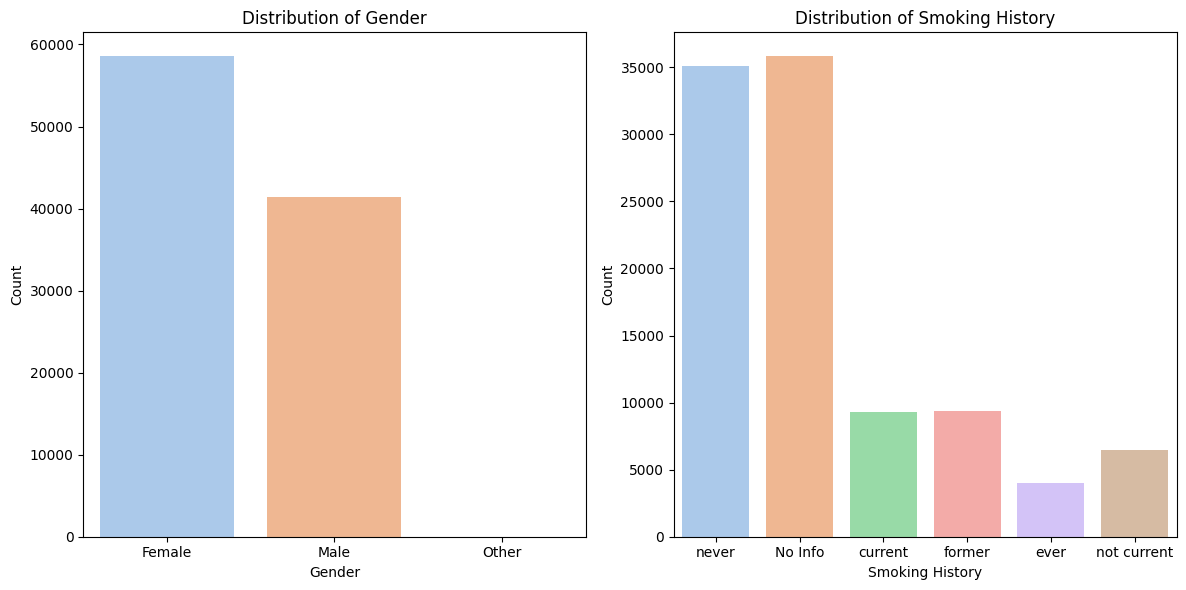

In [51]:
# Let's create bar plots for the 'gender' and 'smoking_history' features to examine their distributions.
plt.figure(figsize=(12, 6))

# Bar plot for Gender
plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x='gender', palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Bar plot for Smoking History
plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x='smoking_history', palette='pastel')
plt.title('Distribution of Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Histograms (Distribution Analysis):
1. **Age**: The age distribution is slightly **skewed toward older individuals**, with a **higher concentration of people between the ages of 20 and 60**. There is also a sudden peak at 80.
2. **Hypertension**: This is a binary feature (0 or 1), so the histogram shows two distinct bars, with **many more individuals not having hypertension** (0).
3. **Heart Disease**: Like hypertension, this is also binary, with **fewer individuals having heart disease (1) compared to those without (0)**.
4. **BMI**: The distribution of BMI seems slightly skewed to the right **(positively skewed)**, with most values between 20 and 35.
5. **HbA1c Level**: The distribution of HbA1c level shows a **normal pattern** with a peak around 5 to 7.
6. **Blood Glucose Level**: The blood glucose levels also seem **normally distributed but with a slight right skew**.

### Boxplots (Outlier Detection):
1. **Age**: There are some outliers in the higher age range.
2. **Hypertension**: As a binary featue, it does not show outliers
3. **Heart Disease**: As a binary feature, it does not show outliers.
4. **BMI**: A few outliers are visible at the upper end (very high BMI values).
5. **HbA1c Level**: Minimal outliers, but generally, the data seems well-contained within expected ranges.
6. **Blood Glucose Level**: A few high outliers are present, indicating individuals with very high blood glucose levels.

These insights will help in understanding which features might need further processing, such as handling outliers or applying transformations.

Here are the insights gained from examining the **Gender** and **Smoking History** categorical features:

### Gender Distribution:
- The dataset has a higher number of **Female** individuals compared to **Male** individuals. There are also almost no **Other** genders. This could indicate a demographic trend or bias in the data collection process.

### Smoking History Distribution:
- The majority of individuals fall into the **"never"** category for smoking history, indicating that most participants have never smoked.
- There are also significant numbers of individuals in the **"former"** and **"current"** categories, but they are less prevalent than non-smokers. This distribution is important for understanding lifestyle factors that may influence diabetes risk.

Note that the categories for Smoking History are somewhat confusing to our understanding. It appears that we are not the only ones, as this issue was raised in the [Kaggle dataset's discussion](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/discussion/402659) but the dataset creator has yet to address this in a meaningful way

3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

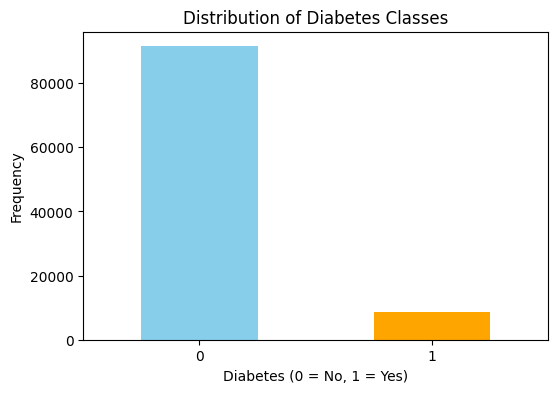

In [52]:
# Checking the distribution of the target variable 'diabetes'
diabetes_distribution = dataset['diabetes'].value_counts()

# Plotting the distribution as a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
diabetes_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Diabetes Classes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


The bar plot shows the distribution of the target variable "diabetes." There is a class imbalance, with more instances of non-diabetic (class 0) than diabetic (class 1). This imbalance may impact model performance if not properly addressed during training, as the model could be biased towards predicting the majority class.

4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [53]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = dataset.drop(columns=['diabetes'])  # Features (excluding target variable)
y = dataset['diabetes']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
# random_state=42: Setting a random seed for reproducibility.
# stratify=y: This ensures that the split maintains the same proportion of classes in both training and testing sets, which is especially important for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (80000, 8)
Testing features shape: (20000, 8)
Training target shape: (80000,)
Testing target shape: (20000,)


### Steps to Avoid Data Leakage

1. **Load the Dataset**: Start by loading the dataset into a DataFrame.

2. **Split the Data First**: Perform the train-test split immediately after loading the dataset, without applying any preprocessing steps (like scaling, encoding, or imputation) to the data.

3. **Preprocess the Data Separately**: Once you have the training and testing sets, apply preprocessing techniques (e.g., normalization, encoding, filling missing values) only to the training set. Then, we use the same parameters or transformations learned from the training set to preprocess the test set. This ensures that the test set remains a true representation of unseen data.

## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

In [54]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output=False to return a dense array

# Fit the encoder on the training set categorical variables and transform them
# 'Gender' and 'Smoking_History' are the categorical columns
X_train_encoded = encoder.fit_transform(X_train[['gender', 'smoking_history']])

# Transform the test set categorical variables using the fitted encoder
X_test_encoded = encoder.transform(X_test[['gender', 'smoking_history']])

# Convert the encoded arrays back to DataFrame and keep the other columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['gender', 'smoking_history']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['gender', 'smoking_history']))

# Combine the encoded categorical columns with the rest of the features
X_train_final = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1).drop(columns=['gender', 'smoking_history'])
X_test_final = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1).drop(columns=['gender', 'smoking_history'])

# Check the shapes of the resulting datasets
print("Training features shape:", X_train_final.shape)
print("Testing features shape:", X_test_final.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (80000, 15)
Testing features shape: (20000, 15)
Training target shape: (80000,)
Testing target shape: (20000,)


### Justification for Using OneHotEncoder:
In this analysis, we utilized **OneHotEncoder** for the categorical variables **`gender`** and **`smoking_history`**. One-hot encoding was chosen because it effectively transforms categorical variables into a format suitable for machine learning algorithms, enabling them to interpret the data correctly. This method creates binary columns for each category, preventing any ordinal relationships between categories that might arise with other encoding methods, such as label encoding.

6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

In [55]:
# Import the necessary library
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Initialize the Scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

In [56]:
def scale_dataset_columns(scaler, X_train, X_test, numerical_columns):
  '''
  scaler: scaler for features
  X_train: df for training data
  X_test: df for test data
  numerical_columns: attributes in an array to be scaled for training and test dfs
  returns X_train_scaled_df, X_test_scaled_df:
  X_train and X_test dfs whose features specified by
  numerical columns are scaled using scaler
  '''

  # Fit the scaler on the numerical features of the training set and transform them
  X_train_scaled = scaler.fit_transform(X_train[numerical_columns])

  # Transform the test set numerical features using the same scaler (without fitting)
  X_test_scaled = scaler.transform(X_test[numerical_columns])

  # Convert the scaled arrays back to DataFrame and retain the column names
  X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_columns, index=X_train.index)
  X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_columns, index=X_test.index)

  return X_train_scaled_df, X_test_scaled_df

In [57]:
num_col_standard = ['age']  # List of numerical columns for standard scaling
num_col_minmax = ['HbA1c_level']  # List of numerical columns for minmax scaling
num_col_robust = ['bmi', 'blood_glucose_level']  # List of numerical columns for robust scaling

#get scaled dataframes of the columns using their respective scalars
X_train_standard, X_test_standard = scale_dataset_columns(standard_scaler, X_train_final, X_test_final, num_col_standard)
X_train_minmax, X_test_minmax = scale_dataset_columns(minmax_scaler, X_train_final, X_test_final, num_col_minmax)
X_train_robust, X_test_robust = scale_dataset_columns(robust_scaler, X_train_final, X_test_final, num_col_robust)

# Replace the original numerical columns with the scaled columns in the final datasets
X_train_final[num_col_standard] = X_train_standard
X_test_final[num_col_standard] = X_test_standard
X_train_final[num_col_minmax] = X_train_minmax
X_test_final[num_col_minmax] = X_test_minmax
X_train_final[num_col_robust] = X_train_robust
X_test_final[num_col_robust] = X_test_robust

In [58]:
# Check the shapes and some statistics to confirm scaling worked
print("Training features shape after scaling:", X_train_final.shape)
print("Testing features shape after scaling:", X_test_final.shape)
print(X_train_final.describe())

Training features shape after scaling: (80000, 15)
Testing features shape after scaling: (20000, 15)
                age  hypertension  heart_disease           bmi   HbA1c_level  blood_glucose_level  gender_Female   gender_Male  gender_Other  smoking_history_No Info  smoking_history_current  \
count  8.000000e+04  80000.000000   80000.000000  80000.000000  80000.000000         80000.000000   80000.000000  80000.000000  80000.000000             80000.000000             80000.000000   
mean  -1.313172e-16      0.074838       0.039500     -0.000530      0.368643            -0.032559       0.585125      0.414675      0.000200                 0.357237                 0.093037   
std    1.000006e+00      0.263131       0.194783      1.121787      0.194675             0.689194       0.492704      0.492669      0.014141                 0.479189                 0.290487   
min   -1.856238e+00      0.000000       0.000000     -2.923986      0.000000            -1.016949       0.000000      0.000

### Explanation:
- **Why StandardScaler?**: StandardScalar standardizes features by setting the mean to 0 and standard deviation to 1. This works best with attributes that are normally distributed, such as `age` in our dataset.

- **Why MinMaxScaler?**: MinMaxScaler scales each features within a range, (e.g. [0,1]). Since the numerical feature, `HbA1c_level`, is within a small range and is not normally distributed, this scaler ensures that the feature's shape is maintained while scaled to a more computable range.

- **Why RobustScaler?**: RobustScaler reduces the impact of outliers by scaling based on the IQR. The numerical features such as `bmi`, `blood_glucose_level` are skewed to the right with a number of outliers, which does not fit StandardScaling the best.

Overall, scaling attributes ensures that they are in a consistent range, which helps many machine learning models converge faster and perform better. Ensuring each attribute is scaled based on its distribution will improve performance and stability.

- **Why fit only on the training set?**: Fitting the scaler on both training and test sets together would cause data leakage, leading to overoptimistic performance estimates. By fitting the scaler only on the training set and applying the same transformation to the test set, we ensure that the model is evaluated on unseen data in a realistic scenario.

## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In [59]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the models with default parameters
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()

# Train the Decision Tree model
dt_model.fit(X_train_final, y_train)

# Train the K-Nearest Neighbors (KNN) model
knn_model.fit(X_train_final, y_train)

# Train the Logistic Regression model
lr_model.fit(X_train_final, y_train)

LogisticRegression()

8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    - Assess the models using metrics such as precision, recall, and F1-score.

In [60]:
# CROSS VALIDATION
# Import necessary libraries
from sklearn.model_selection import cross_val_score

# Set the number of folds for cross-validation
n_folds = 5

# Perform cross-validation for Decision Tree
cv_scores_dt = cross_val_score(dt_model, X_train_final, y_train, cv=n_folds)

# Perform cross-validation for K-Nearest Neighbors
cv_scores_knn = cross_val_score(knn_model, X_train_final, y_train, cv=n_folds)

# Perform cross-validation for Logistic Regression
cv_scores_lr = cross_val_score(lr_model, X_train_final, y_train, cv=n_folds)

# Print the average cross-validation scores
print(f"Decision Tree CV Average Score: {cv_scores_dt.mean():.4f}")
print(f"K-Nearest Neighbors CV Average Score: {cv_scores_knn.mean():.4f}")
print(f"Logistic Regression CV Average Score: {cv_scores_lr.mean():.4f}")

Decision Tree CV Average Score: 0.9511
K-Nearest Neighbors CV Average Score: 0.9495
Logistic Regression CV Average Score: 0.9601


### Justification for the Number of Folds:
- **5-Fold Cross-Validation**: A common choice that balances computational efficiency and performance estimation. It's widely used when you have a moderate-sized dataset and want to avoid excessive computation while still getting a reliable estimate.
- **10-Fold Cross-Validation**: Often used to get a more accurate performance estimate, particularly when the dataset is small. It provides a lower variance in the performance estimate but requires more computation.
  
Given that 5-fold is typically sufficient for most datasets (and the diabetes dataset is moderate in size), we'll proceed with **5-Fold Cross-Validation**.

In [61]:
# Import necessary libraries for metrics and cross-validation
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_predict

# Perform cross-validation predictions for each model
y_pred_dt = cross_val_predict(dt_model, X_train_final, y_train, cv=n_folds)
y_pred_knn = cross_val_predict(knn_model, X_train_final, y_train, cv=n_folds)
y_pred_lr = cross_val_predict(lr_model, X_train_final, y_train, cv=n_folds)

# Calculate and print metrics for Decision Tree
print("Decision Tree Metrics:")
print(f"Precision: {precision_score(y_train, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_dt):.4f}")
print(f"F1-score: {f1_score(y_train, y_pred_dt):.4f}")
print("\nClassification Report:\n", classification_report(y_train, y_pred_dt))

# Calculate and print metrics for K-Nearest Neighbors
print("K-Nearest Neighbors Metrics:")
print(f"Precision: {precision_score(y_train, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_knn):.4f}")
print(f"F1-score: {f1_score(y_train, y_pred_knn):.4f}")
print("\nClassification Report:\n", classification_report(y_train, y_pred_knn))

# Calculate and print metrics for Logistic Regression
print("Logistic Regression Metrics:")
print(f"Precision: {precision_score(y_train, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_train, y_pred_lr):.4f}")
print("\nClassification Report:\n", classification_report(y_train, y_pred_lr))

Decision Tree Metrics:
Precision: 0.7037
Recall: 0.7363
F1-score: 0.7197

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     73200
           1       0.70      0.74      0.72      6800

    accuracy                           0.95     80000
   macro avg       0.84      0.85      0.85     80000
weighted avg       0.95      0.95      0.95     80000

K-Nearest Neighbors Metrics:
Precision: 0.8381
Recall: 0.5034
F1-score: 0.6290

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     73200
           1       0.84      0.50      0.63      6800

    accuracy                           0.95     80000
   macro avg       0.90      0.75      0.80     80000
weighted avg       0.95      0.95      0.94     80000

Logistic Regression Metrics:
Precision: 0.8712
Recall: 0.6229
F1-score: 0.7265

Classification Report:
               precision    recall  f1-sc

**In terms of CV Average Score and F1 score from worst to best:**
Logistic Regression, Decision Tree, K-Nearest Neighbours.

**In terms of precision from worst to best:**
Logistic Regression, K-Nearest Neighbours, Decision Tree.

**In terms of recall from worst to best:** Decision Tree,
Logistic Regression, K-Nearest Neighbours.

With default settings, logistic regression ranked the highest, only getting second in recall. K-Nearest neighbours ranked the lowest except ranking second in precision.

## Hyperparameter Optimization

9. **Exploration and Performance Evaluation:**

    - Investigate the impact of varying hyperparameter values on the performance of each model.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Display the results in a tabular or graphical format (e.g., line charts, bar charts) to effectively demonstrate the influence of hyperparameter variations on model performance.

    - Specify the default values for each hyperparameter tested.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

The following code uses grid search and 5-fold cross validation on precision, recall, and F1-score to get the best hyperparameter combination where the model is refitted based on the highest mean F1-score. (Note, these grid search functions take a very long time to run since they test all hyperparameter combinations. The decision tree runs the fastest.)

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

scoring = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

In [63]:
def grid_search_hyperparams(clf, param_grid, X_train_final, y_train):
  '''
  clf: classifier
  param_grid: dictionary of hyperparameter value arrays
  X_train_final: X training set
  y_train: y training set
  '''
  # Initialize GridSearchCV
  grid_search = GridSearchCV(
      estimator=clf,            # The model to use
      param_grid=param_grid,    # Parameter grid to search over
      cv=5,                     # Number of cross-validation folds
      scoring=scoring,          # Metric to optimize
      refit="f1_macro",         # Select the best model based on f1-score
      n_jobs=-1,                # Use all processors
      verbose=2                 # Print progress messages
  )

  # Fit the grid search to the training data
  grid_search.fit(X_train_final, y_train)

  # Get the best parameters and best score
  print("Best Hyperparameters:", grid_search.best_params_)
  print("Best Cross-validation F1-Score:", grid_search.best_score_)

  return grid_search

In [64]:
clf_dt = DecisionTreeClassifier()

# Define the parameter grid of decision tree classifier
param_grid_dt = {
    'criterion': ["gini", "entropy", "log_loss"],  # criterion to measure quality of split, default=”gini”
    'max_depth': [None, 3, 5, 7, 9, 11,13,15,17,19,21,23],  # Maximum depth of the tree, default=None
}

grid_search_dt = grid_search_hyperparams(clf_dt, param_grid_dt, X_train_final, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 9}
Best Cross-validation F1-Score: 0.8938396650700644


In [65]:
# Collect results
results_dt = grid_search_dt.cv_results_
params_dt = results_dt['params']
f1_scores_dt = results_dt['mean_test_f1_macro']
precision_scores_dt = results_dt['mean_test_precision']
recall_scores_dt = results_dt['mean_test_recall']

# Extract individual hyperparameter values for plotting
max_depths = [param['max_depth'] for param in params_dt]
criteria = [param['criterion'] for param in params_dt]

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def plot_max_scores_by_hyperparam(params, f1_scores, precision_scores, recall_scores, hyperparam, y_range=None):
    """
    Plots bar charts of max F1, precision, and recall scores for a given hyperparameter.

    Parameters:
    - params: List of dictionaries with hyperparameters from GridSearchCV
    - f1_scores: List of F1 scores corresponding to each parameter set
    - precision_scores: List of precision scores corresponding to each parameter set
    - recall_scores: List of recall scores corresponding to each parameter set
    - hyperparam: The hyperparameter name to analyze (e.g., 'criterion', 'max_depth')
    - y_range: Tuple (min, max) to set the y-axis range (optional)
    """
    # Group scores by the specified hyperparameter and find the max scores
    max_f1_by_param = defaultdict(float)
    max_precision_by_param = defaultdict(float)
    max_recall_by_param = defaultdict(float)

    for i, param in enumerate(params):
        param_value = param[hyperparam]  # Get the value of the given hyperparameter
        max_f1_by_param[param_value] = max(max_f1_by_param[param_value], f1_scores[i])
        max_precision_by_param[param_value] = max(max_precision_by_param[param_value], precision_scores[i])
        max_recall_by_param[param_value] = max(max_recall_by_param[param_value], recall_scores[i])

    # Convert dictionaries to lists for plotting
    param_values = list(max_f1_by_param.keys())
    max_f1_values = list(max_f1_by_param.values())
    max_precision_values = list(max_precision_by_param.values())
    max_recall_values = list(max_recall_by_param.values())

    # Plotting the bar plots
    x = np.arange(len(param_values))  # Positions for bars
    width = 0.25  # Width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    # Bar plots for each metric
    bars1 = ax.bar(x - width, max_f1_values, width, label='F1 Score', color='blue', alpha=0.7)
    bars2 = ax.bar(x, max_precision_values, width, label='Precision', color='orange', alpha=0.7)
    bars3 = ax.bar(x + width, max_recall_values, width, label='Recall', color='green', alpha=0.7)

    # Add data labels on top of the bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',  # Format with 2 decimal places
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # Offset label slightly above the bar
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_labels(bars1)
    add_labels(bars2)
    add_labels(bars3)

    # Set y-axis range for better visualization (if provided)
    if y_range:
        ax.set_ylim(y_range)
    else:
        # Automatically set y-limits with a small margin
        ax.set_ylim(0, max(max(max_f1_values), max(max_precision_values), max(max_recall_values)) + 0.05)

    # Add grid lines for better readability
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

    # Labels, title, and legend
    ax.set_xticks(x)
    ax.set_xticklabels(param_values, rotation=45)  # Rotate labels for better readability
    ax.set_xlabel(hyperparam.capitalize())
    ax.set_ylabel('Score')
    ax.set_title(f'Max Scores by {hyperparam.capitalize()}')
    ax.legend()

    plt.tight_layout()
    plt.show()

In [67]:
def plot_param_scores(hyperparam, f1_scores, precision_scores, recall_scores, param_name):
  # Plotting the results
  fig, axes = plt.subplots(1, 3, figsize=(18, 5))

  # Plot F1 Scores vs Max Depth
  axes[0].plot(hyperparam, f1_scores, marker='o', linestyle='-', label='F1 Score')
  axes[0].set_title(f'F1 Score vs {param_name}')
  axes[0].set_xlabel(param_name)
  axes[0].set_ylabel('F1 Score')
  axes[0].legend()
  axes[0].grid(True)

  # Plot Precision Scores vs Max Depth
  axes[1].plot(hyperparam, precision_scores, marker='o', linestyle='-', label='Precision', color='orange')
  axes[1].set_title(f'Precision vs {param_name}')
  axes[1].set_xlabel(param_name)
  axes[1].set_ylabel('Precision Score')
  axes[1].legend()
  axes[1].grid(True)

  # Plot Recall Scores vs Max Depth
  axes[2].plot(hyperparam, recall_scores, marker='o', linestyle='-', label='Recall', color='green')
  axes[2].set_title(f'Recall vs {param_name}')
  axes[2].set_xlabel(param_name)
  axes[2].set_ylabel('Recall Score')
  axes[2].legend()
  axes[2].grid(True)

  plt.tight_layout()
  plt.show()

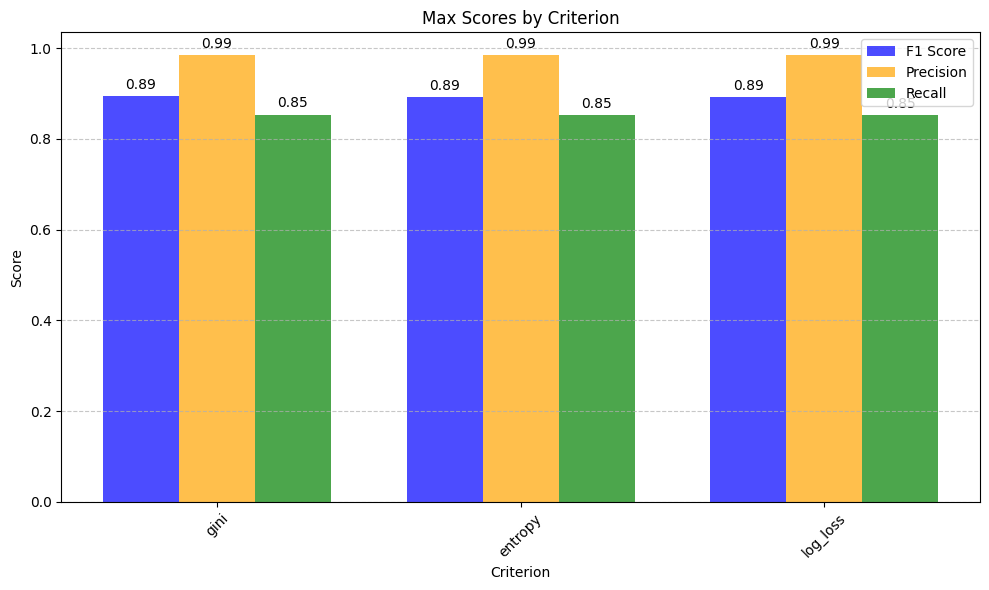

In [68]:
plot_max_scores_by_hyperparam(params_dt, f1_scores_dt, precision_scores_dt, recall_scores_dt, 'criterion')

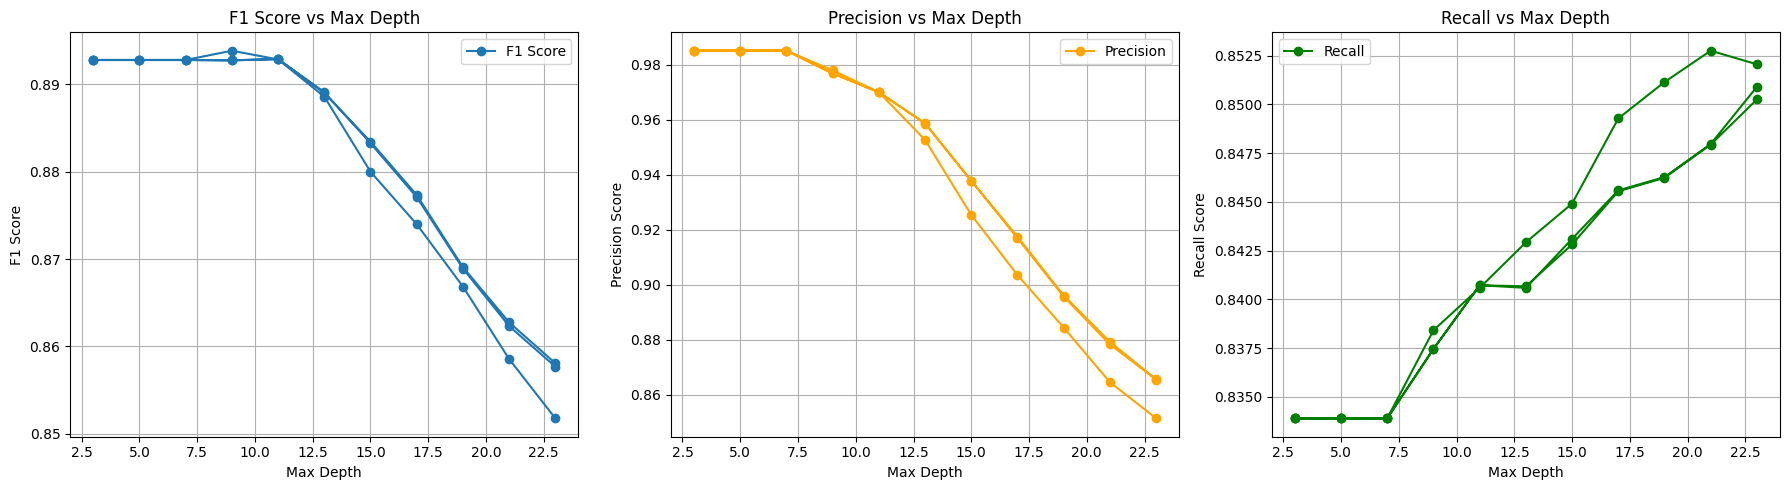

In [69]:
plot_param_scores(max_depths, f1_scores_dt, precision_scores_dt, recall_scores_dt, "Max Depth")

The following config with the above functions takes about 5 minutes to complete

In [70]:
clf_knn = KNeighborsClassifier()

# Define the parameter grid of k nearest neighbour classifier
param_grid_knn = {
    'n_neighbors': range(1, 11),  # number of neighbours, default=5
    'weights': ["uniform", "distance"],  # Weight function used in prediction, default=’uniform’
}

grid_search_knn = grid_search_hyperparams(clf_knn, param_grid_knn, X_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_neighbors': 6, 'weights': 'distance'}
Best Cross-validation F1-Score: 0.804344511725241


In [71]:
# Collect results
results_knn = grid_search_knn.cv_results_
params_knn = results_knn['params']
f1_scores_knn = results_knn['mean_test_f1_macro']
precision_scores_knn = results_knn['mean_test_precision']
recall_scores_knn = results_knn['mean_test_recall']

# Extract individual hyperparameter values for plotting
n_neighbors = [param['n_neighbors'] for param in params_knn]
weights = [param['weights'] for param in params_knn]

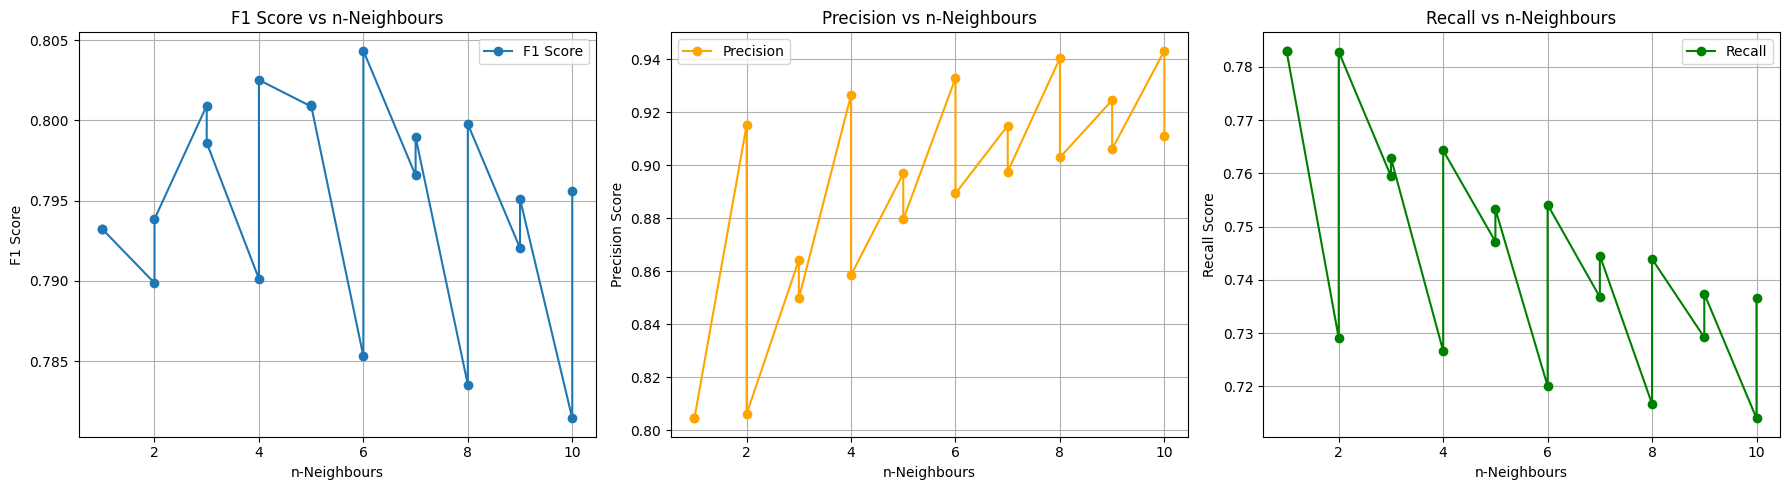

In [72]:
plot_param_scores(n_neighbors, f1_scores_knn, precision_scores_knn, recall_scores_knn, "n-Neighbours")

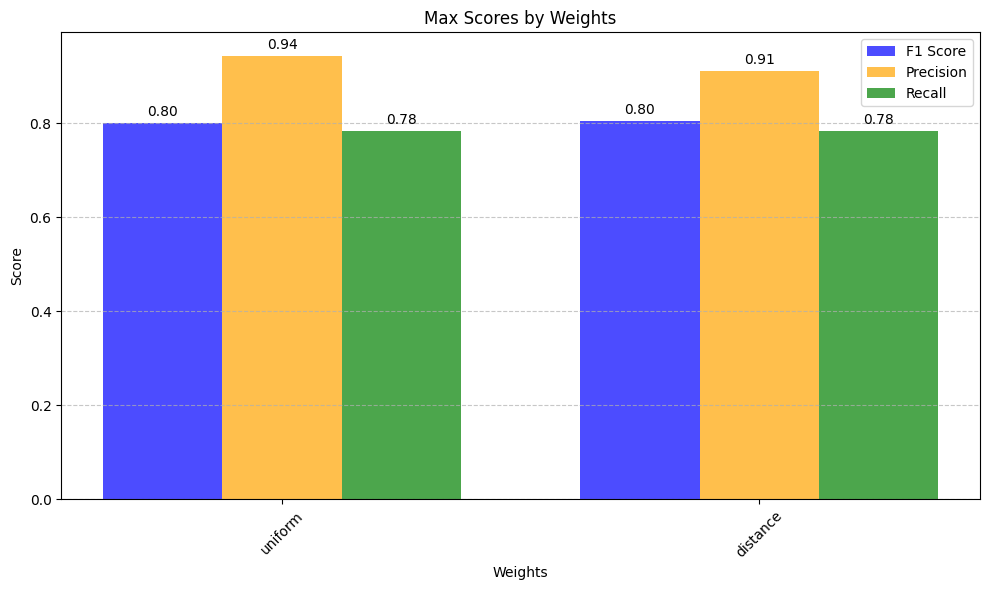

In [73]:
plot_max_scores_by_hyperparam(params_knn, f1_scores_knn, precision_scores_knn, recall_scores_knn, 'weights')

The following config with the above functions takes about 2 minutes to complete

In [74]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

clf_lr = LogisticRegression()

# Define the parameter grid of logistic regression
param_grid_lr = {
    'penalty': ["l2", None], #norm of the penalty, default='l2' (note, there are more penalties, l1 and elasticnet, which requires a different solver, which we will ignore since we will just use the default solver)
    'max_iter': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,100],  # max number of iterations for solvers to converge, default=100
    'tol': [0.0001, 0.001, 0.01, 0.1, 1],  # stopping criteria tolerance, default=1e-4
}

grid_search_lr = grid_search_hyperparams(clf_lr, param_grid_lr, X_train_final, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
Best Hyperparameters: {'max_iter': 15, 'penalty': None, 'tol': 0.0001}
Best Cross-validation F1-Score: 0.8535723865429043


In [75]:
# Collect results
results_lr = grid_search_lr.cv_results_
params_lr = results_lr['params']
f1_scores_lr = results_lr['mean_test_f1_macro']
precision_scores_lr = results_lr['mean_test_precision']
recall_scores_lr = results_lr['mean_test_recall']

# Extract individual hyperparameter values for plotting
penalty = [param['penalty'] for param in params_lr]
max_iter = [param['max_iter'] for param in params_lr]
tol = [param['tol'] for param in params_lr]

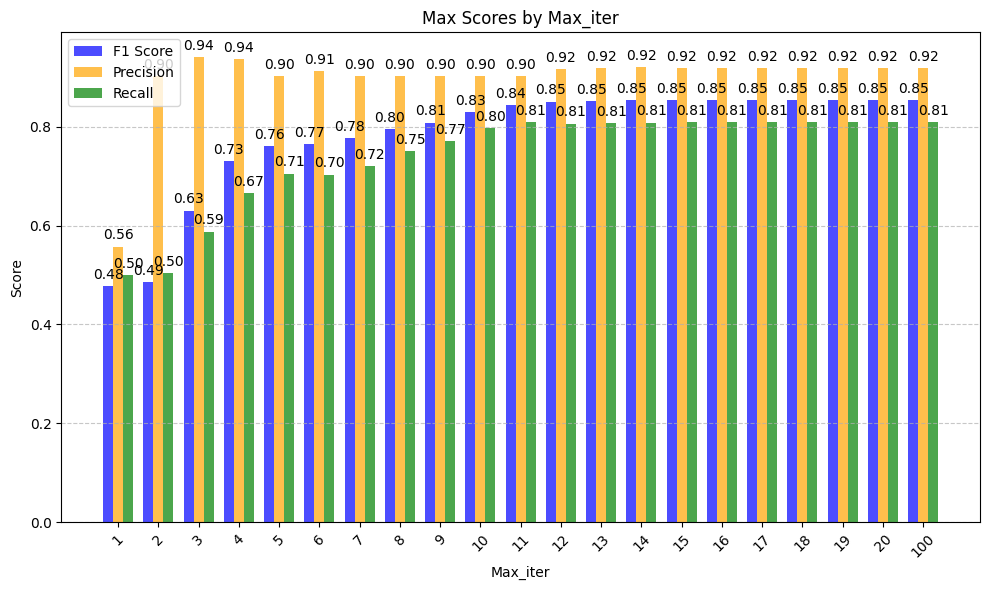

In [76]:
plot_max_scores_by_hyperparam(params_lr, f1_scores_lr, precision_scores_lr, recall_scores_lr, 'max_iter')

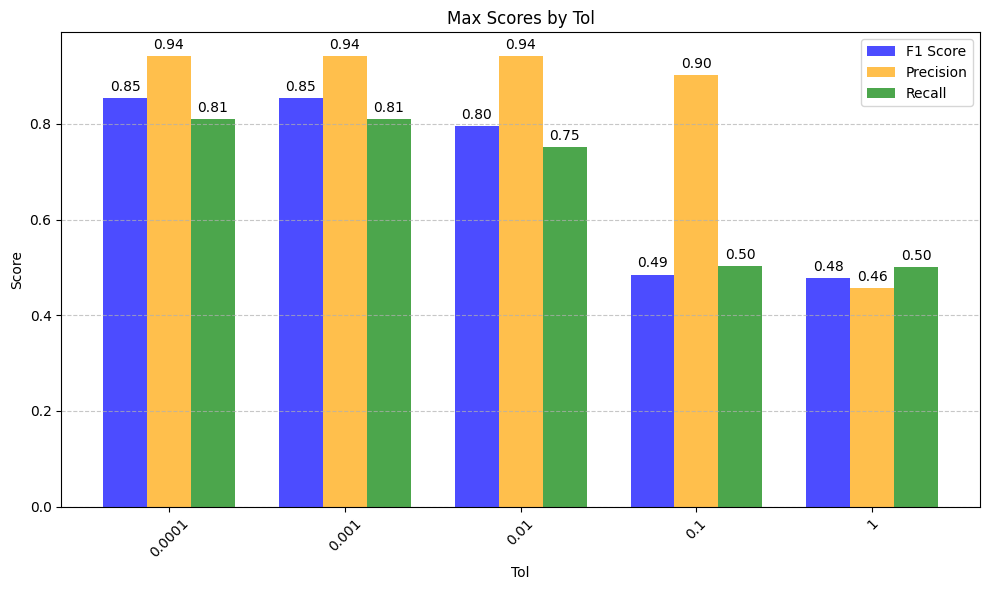

In [77]:
plot_max_scores_by_hyperparam(params_lr, f1_scores_lr, precision_scores_lr, recall_scores_lr, 'tol')

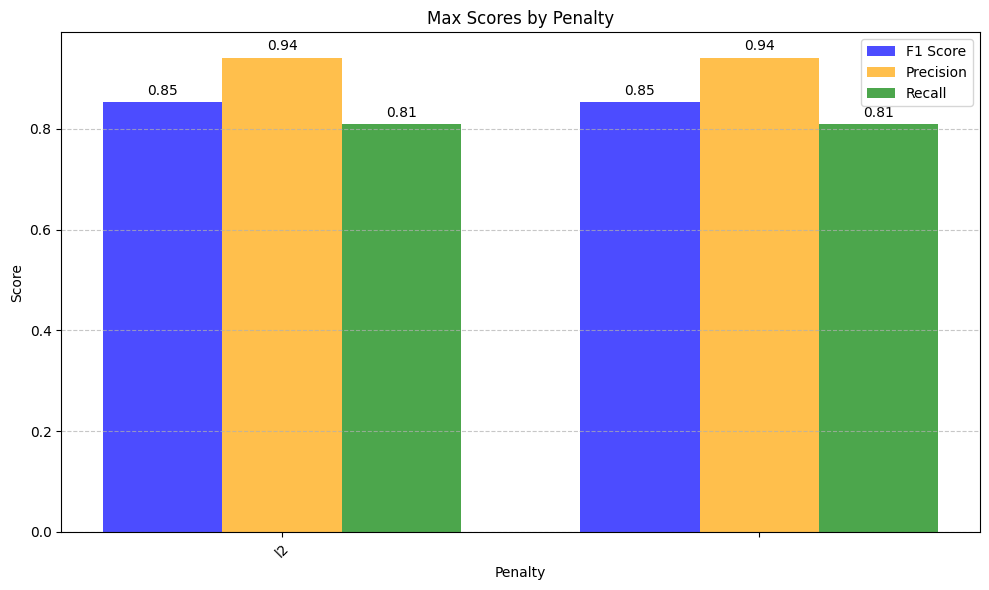

In [78]:
plot_max_scores_by_hyperparam(params_lr, f1_scores_lr, precision_scores_lr, recall_scores_lr, 'penalty')

**Analysis of findings**

1. **Decision Tree**:
   - The **Gini** criterion with a **max_depth of 9** achieved the best balance between precision and recall. Increasing the depth further led to overfitting, where the model captured more true positives but with more false positives.
   
2. **K-Nearest Neighbors**:
   - **6 neighbors** with **distance-based weighting** provided the best F1-score. Adding more neighbors or using uniform weighting reduced the model's ability to correctly identify positive cases.
   
3. **Logistic Regression**:
   - The best configuration was **no regularization (`penalty=None`)**, **15 iterations**, and **small tolerance (`tol=0.0001`)**. Regularization didn't improve performance, and the model converged well within 15 iterations.


## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

# Compare the results obtained from each model

In [79]:
def score_ind_hyperparams(y_train, y_pred):
  '''
  y_train: y df from training data
  y_pred: y df from model
  returns: None
  '''
  #print(f"Mean: {clf_scores.mean():.2f}")
  #print(f"Standard deviation: {clf_scores.std():.2f}")
  print(f"Precision: {precision_score(y_train, y_pred):.4f}")
  print(f"Recall: {recall_score(y_train, y_pred):.4f}")
  print(f"F1-score: {f1_score(y_train, y_pred):.4f}")

In [80]:
# Code cell
# Remove the two models we dont need later
clf = DecisionTreeClassifier(max_depth=9, criterion='gini')
#clf_scores = cross_val_score(clf, X_train_final, y_train, cv=5)
y_pred_dt = cross_val_predict(clf, X_train_final, y_train, cv=n_folds)
score_ind_hyperparams(y_train, y_pred_dt)

Precision: 0.9848
Recall: 0.6778
F1-score: 0.8030


In [81]:
clf_dt = DecisionTreeClassifier(max_depth=9)
clf_dt.fit(X_train_final, y_train)
test_score=clf_dt.score(X_test_final,y_test)
print(f"Test set score: {test_score:.4f}")

Test set score: 0.9718


In [82]:
clf_knn = KNeighborsClassifier(n_neighbors=6, weights="distance")
#clf_scores = cross_val_score(clf_knn, X_train_final, y_train, cv=5)
y_pred_knn = cross_val_predict(clf_knn, X_train_final, y_train, cv=n_folds)
score_ind_hyperparams(y_train, y_pred_knn)

Precision: 0.8218
Recall: 0.5187
F1-score: 0.6360


In [83]:
clf_knn.fit(X_train_final, y_train)
test_score=clf_knn.score(X_test_final,y_test)
print(f"Test set score: {test_score:.4f}")

Test set score: 0.9506


In [84]:
clf_lr = LogisticRegression(penalty=None,max_iter=15,tol=0.0001)
#clf_scores = cross_val_score(clf_lr, X_train_final, y_train, cv=5)
y_pred_lr = cross_val_predict(clf_lr, X_train_final, y_train, cv=n_folds)
score_ind_hyperparams(y_train, y_pred_lr)

Precision: 0.8696
Recall: 0.6269
F1-score: 0.7286


In [85]:
clf_lr.fit(X_train_final, y_train)
test_score=clf_lr.score(X_test_final,y_test)
print(f"Test set score: {test_score:.4f}")

Test set score: 0.9603


### Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance overfitting, and the impact of parameter tuning on overall results.

1. **Decision Tree Classifier:**
   - **Test Accuracy**: 97.17%
   - **Cross-Validation (CV)**: Precision = 0.9848, Recall = 0.6778, F1-score = 0.8030
   - **Key Insights**: Strong precision but lower recall, indicating the model handles non-diabetic cases well but misses some diabetic cases. The controlled depth (`max_depth=9`) prevents overfitting and allows better generalization.

2. **K-Nearest Neighbors (KNN):**
   - **Test Accuracy**: 95.06%
   - **CV**: Precision = 0.8218, Recall = 0.5187, F1-score = 0.6360
   - **Key Insights**: High precision but poor recall, meaning it misses many true positives. KNN struggles with the class imbalance, and while distance-based weighting helps, it’s not enough to improve recall.

3. **Logistic Regression:**
   - **Test Accuracy**: 96.03%
   - **CV**: Precision = 0.8696, Recall = 0.6269, F1-score = 0.7286
   - **Key Insights**: Offers a good balance between precision and recall, with strong generalization. Logistic Regression performs well with minimal tuning but may miss some non-linear relationships in the data.



### Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.
- **Best Choice**: **Decision Tree**. It achieves the best trade-off between precision and recall, making it more effective at identifying both diabetic and non-diabetic cases.
- **Alternative**: **Logistic Regression** is simpler and offers consistent results, especially if interpretability and computational efficiency are priorities.
- **Not Recommended**: **KNN** due to its low recall and inability to handle class imbalance effectively.

### Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Train the Decision Tree with optimal parameters
clf_dt = DecisionTreeClassifier(max_depth=9, criterion='gini')
clf_dt.fit(X_train_final, y_train)

# Apply the trained model to the test data
y_test_pred = clf_dt.predict(X_test_final)

# Evaluate the performance on the test set
precision_dt = precision_score(y_test, y_test_pred)
recall_dt = recall_score(y_test, y_test_pred)
f1_dt = f1_score(y_test, y_test_pred)
classification_report_dt = classification_report(y_test, y_test_pred)

# Display the results
print(f"Test Set Precision: {precision_dt:.4f}")
print(f"Test Set Recall: {recall_dt:.4f}")
print(f"Test Set F1-score: {f1_dt:.4f}")
print("\nClassification Report:\n", classification_report_dt)

Test Set Precision: 0.9781
Test Set Recall: 0.6824
Test Set F1-score: 0.8039

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.98      0.68      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.97      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



### **Comprehensive Observations:**

#### **Test Set Performance Summary:**
- **Precision**: 0.9781
- **Recall**: 0.6824
- **F1-Score**: 0.8039
- **Accuracy**: 97%

The test set results indicate that the **Decision Tree Classifier** performs well on unseen data. Here's a detailed breakdown of the key observations:

### 1. **Comparison with Cross-Validation Results**:
- **Cross-Validation Precision**: 0.9848 vs. **Test Set Precision**: 0.9781
- **Cross-Validation Recall**: 0.6778 vs. **Test Set Recall**: 0.6824
- **Cross-Validation F1-Score**: 0.8030 vs. **Test Set F1-Score**: 0.8039

#### **Consistency**:
- The **precision** on the test set (0.9781) is very close to the cross-validation precision (0.9848), suggesting that the model consistently avoids false positives when predicting diabetic cases.
- The **recall** on the test set (0.6824) is also very similar to the cross-validation recall (0.6778), meaning the model's ability to identify true diabetic cases remains stable.
- The **F1-score** (0.8039) shows that the model maintains a good balance between precision and recall across both the cross-validation and test sets. This consistency indicates that the model is generalizing well to unseen data.

#### **Conclusion on Consistency**:
The test set results are highly consistent with the cross-validation performance. This indicates that the Decision Tree model is not overfitting to the training data and generalizes well across different datasets.

### 2. **Precision vs. Recall Trade-off**:
- **High Precision**: The model is very confident in its positive predictions (diabetic cases) and makes few false positive errors, as indicated by the high precision (0.9781). This is essential in medical scenarios where false positives can lead to unnecessary interventions.
- **Moderate Recall**: The recall (0.6824) shows that the model misses some diabetic cases. While this is not ideal, it is still a reasonable performance given the class imbalance.

### 3. **Class-Specific Performance**:
- For the **non-diabetic class (0)**, the model performs exceptionally well, with near-perfect precision and recall. This indicates the model’s bias toward predicting the majority class, which is expected in imbalanced datasets.
- For the **diabetic class (1)**, precision is very high (0.98), but recall is lower (0.68), indicating that while the model is confident when it predicts diabetes, it misses some true positives. This reflects the trade-off between identifying all positive cases and avoiding false positives.

### 4. **Class Imbalance Impact**:
- The model’s high accuracy (97%) could be misleading due to the class imbalance, as accuracy alone doesn’t reflect how well the model performs for the minority class (diabetic cases).
- The **macro average recall** (0.84) and **macro average F1-score** (0.89) provide a more balanced view of the model’s overall performance, accounting for both classes equally.

### 5. **Conclusion and Recommendations**:
- The model’s performance is strong, with a good balance between precision and recall. It generalizes well from cross-validation to the test set, indicating that the chosen parameters (e.g., `max_depth=9`) are effective.
- If the task prioritizes minimizing false positives, the current setup is well-suited due to its high precision.
- However, if the task prioritizes identifying all diabetic cases (i.e., improving recall), further adjustments like class weighting or handling the class imbalance (e.g., SMOTE, adjusting `class_weight='balanced'`) might improve recall without sacrificing too much precision.

## 2. Documentation of Exploratory Analysis

The report should comprehensively document the entire process followed during this assignment. The Jupyter Notebook must include the following:

- Your name(s), student number(s), and a report title.
- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes?
- A section for each step of the exploratory analysis, containing the relevant Python code and explanations or results.
  - For sections requiring Python code, include the code in a cell.
  - For sections requiring explanations or results, include these in a separate cell or in combination with code cells.
- Ensure logical separation of code into different cells. For example, the definition of a function should be in one cell and its execution in another. Avoid placing too much code in a single cell to maintain clarity and readability.
- The notebook you submit must include the results of the execution, complete with graphics, ensuring that the teaching assistant can grade the notebook without needing to execute the code.

# Resources
For dataset summarization:
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data

For dataset issues: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/discussion/402659

For BMI issues: https://www.medicalnewstoday.com/articles/265215#Waist-size-linked-to-diabetes-risk,-regardless-of-BMI

The following libraries used throughout:
https://pandas.pydata.org/docs/index.html

Classifiers:
1. https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

2. https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

3. https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Scalers:
1. https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler

2. https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

3. https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

**Task split**:
1. *Thulam Tran*: Summary of Dataset Structure, Normalization/Standardization of Numerical Features, Model Evaluation, Hyperparameter Optimization Exploration, Analysis of Results Exploration

2. *Samy Touabi*: Feature Distribution Analysis, Target Variable Distribution, Data Splitting, Categorical Variable Encoding, Model Development, Model Evaluation, Hyperparameter Optimization Evaluation, Analysis of Results Evaluation

Each member split the work equally and still contributed to all sections by reviewing each other's work. Thus all learning outcomes have been achieved.

## AI Transcripts
1. [Samy Chat GPT 1](https://chatgpt.com/share/6715a767-4f44-8013-85e3-fcb5a6b57060)  (scroll to bottom for this assignment's discussion)
2. [Thulam Chat GPT 1](https://drive.google.com/file/d/1AljwShIqT49ta7LmUYDLcPx4D49zgzAW/view?usp=sharing)
3. [Thulam Chat GPT 2](https://drive.google.com/file/d/1QDiDjHMmlAsXk2n8mLAoo3COYFk7ROAc/view?usp=sharing) (primarily used for visualization of hyperparameter scores)
